# 14-1 : MNIST 데이터셋을 이용한 pca, svm, rf

MNIST 데이터셋을 불러와 60,000개를 훈련세트로 배정합시다.
1. 랜덤 PCA를 사용하여 차원을 154차원으로 축소하여 보세요.
2. 축소한 차원 데이터셋을 이용하여 SVM분류를 해보세요.
3. 축소한 차원 데이터셋을 사용하여 랜덤 포레스트 분류를 훈련시켜 보세요.
4. 이제 테스트 셋에 위 두 개의 분류기를 평가해 보세요.(3장에서sgd의 정확도가 90%정도였습니다.)


In [1]:
# fundamentals
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# data
from sklearn.datasets import fetch_openml

# holdout
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# preprocessing
from sklearn.decomposition import PCA

# model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# evaluation
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
X = mnist['data'] / 255
y = mnist["target"].astype(np.int)

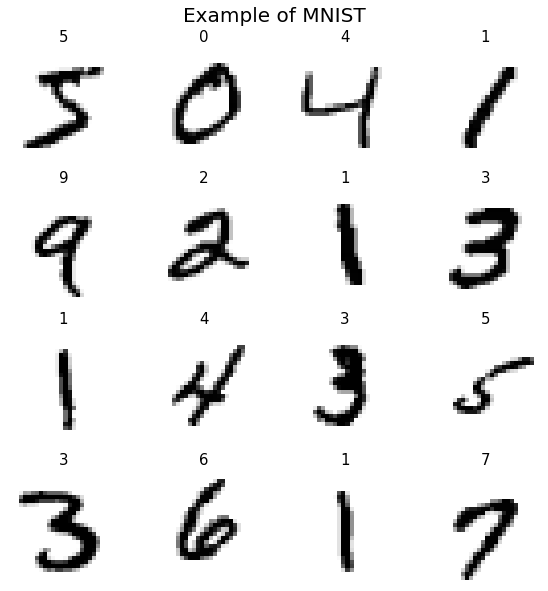

In [4]:
X_plot = X[:16].reshape(16, 28, 28)
y_plot = y[:16]

fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (8, 8))
axes = axes.ravel()

for index, ax in enumerate(axes):
    ax.imshow(X_plot[index], cmap = plt.cm.binary)
    ax.set_title('{}'.format(y[index]), fontsize = 15)
    ax.axis('off')

fig.suptitle('Example of MNIST', y = 1.02, fontsize = 20)
plt.tight_layout()
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 6 / 7,
                                                    stratify = y,
                                                    random_state = 20152410)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [7]:
pca_model_1 = PCA(n_components = 154, svd_solver = 'randomized', random_state = 20152410)
pca_model_1.fit(X_train)

X_train_pca_1 = pca_model_1.transform(X_train)
X_test_pca_1 = pca_model_1.transform(X_test)

In [8]:
print('154개로 차원 축소 했을 때 PCA로 설명되는 분산 비율 : {:0.2f}%'.format(100*np.sum(pca_model_1.explained_variance_ratio_)))

154개로 차원 축소 했을 때 PCA로 설명되는 분산 비율 : 95.01%


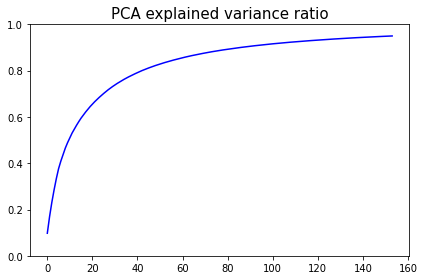

In [9]:
plt.figure(figsize = (6, 4))
plt.plot(list(range(len(pca_model_1.explained_variance_ratio_))),
         np.cumsum(pca_model_1.explained_variance_ratio_),
         'b-')

plt.title('PCA explained variance ratio', fontsize = 15)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

너무 오래 걸려...

In [10]:
# C_list = np.logspace(-2, 1, 10)
# n_estimators_list = list(range(50, 501, 50))

# print(C_list)
# print(n_estimators_list)

In [11]:
# svc_cv_accuracy = [cross_val_score(estimator = SVC(kernel = 'linear', C = c),
#                                    X = X_train_pca_1,
#                                    y = y_train,
#                                    cv = 4,
#                                    scoring = make_scorer(accuracy_score)).mean() for c in C_list]

In [12]:
# rf_clf_cv_accuracy = [cross_val_score(estimator = RandomForestClassifier(n_estimators = number),
#                                             X = X_train_pca_1,
#                                             y = y_train,
#                                             cv = 4,
#                                             scoring = make_scorer(accuracy_score)).mean() for number in n_estimators_list]

In [13]:
# best_C = C_list[np.argmax(svc_cv_accuracy)]

# print("Linear SVC max cv accuracy : {:0.2f}%".format(100*np.max(svc_cv_accuracy)))
# print("CV accuracy가 최대일 때의 C : {}".format(best_C))

In [14]:
# best_n_estimators = n_estimators_list[np.argmax(rf_clf_cv_accuracy)]

# print("Random Forest max cv accuracy : {:0.2f}%".format(100*np.max(rf_clf_cv_accuracy)))
# print("CV accuracy가 최대일 때의 n_estimators : {}".format(best_n_estimators))

In [15]:
svm_clf = SVC(kernel='linear')
rf_clf = RandomForestClassifier(random_state = 20152410)

In [16]:
svm_clf.fit(X_train_pca_1, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
rf_clf.fit(X_train_pca_1, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20152410,
                       verbose=0, warm_start=False)

In [18]:
y_test_pred_svm = svm_clf.predict(X_test_pca_1)
y_test_pred_rf = rf_clf.predict(X_test_pca_1)

In [19]:
print("Linear SVC test accuracy : {:0.2f}%".format(100*accuracy_score(y_test, y_test_pred_svm)))
print("\n")
print(confusion_matrix(y_test, y_test_pred_svm))
print("\n")
print(classification_report(y_test, y_test_pred_svm))

Linear SVC test accuracy : 93.85%


[[ 954    1    7    3    0    8    5    1    6    1]
 [   1 1107    4    2    1    1    0    1    8    0]
 [   5    6  930   14    8    3    7   11   14    1]
 [   1    5   22  948    1   20    2    5   13    3]
 [   2    1   10    0  921    2    5    6    1   27]
 [   5    6    7   25   11  813   17    2   13    3]
 [   6    2   13    1    3   15  940    0    2    0]
 [   2    3   12   13   10    1    1  981    1   18]
 [   5   14    8   25    4   20    7    3  880    9]
 [   4    3    1   11   30    7    0   22    5  911]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       986
           1       0.96      0.98      0.97      1125
           2       0.92      0.93      0.92       999
           3       0.91      0.93      0.92      1020
           4       0.93      0.94      0.94       975
           5       0.91      0.90      0.91       902
           6       0.96      0.96      0.96       98

In [20]:
print("Random Forest test accuracy : {:0.2f}%".format(100*accuracy_score(y_test, y_test_pred_rf)))
print("\n")
print(confusion_matrix(y_test, y_test_pred_rf))
print("\n")
print(classification_report(y_test, y_test_pred_rf))

Random Forest test accuracy : 94.70%


[[ 958    0    7    3    2    2    6    1    5    2]
 [   0 1107    8    3    1    2    3    0    0    1]
 [   5    0  943   10    4    2    3   12   19    1]
 [   1    1   14  954    0   12    3    5   21    9]
 [   0    3    7    2  939    0    3    2    3   16]
 [   4    0    2   24   10  835   16    1    4    6]
 [   7    1    5    2    1   14  950    0    2    0]
 [   3    3   10    1   16    0    0  986    5   18]
 [   8    6   10   22    1   16    6    5  889   12]
 [   3    2    6   14   28    9    1   16    6  909]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       986
           1       0.99      0.98      0.98      1125
           2       0.93      0.94      0.94       999
           3       0.92      0.94      0.93      1020
           4       0.94      0.96      0.95       975
           5       0.94      0.93      0.93       902
           6       0.96      0.97      0.96      

# 14-2 : MNIST 데이터셋을 이용한 pca, svm, rf

MNIST 데이터셋을 불러와 60,000개를 훈련세트로 배정합시다.
1. PCA를 사용하여 분산이 95% 유지되도록 차원을 축소하여 보세요.
2. 축소한 차원 데이터셋을 사용하여 랜덤 포레스트 분류를 훈련시켜 보세요.
3. 차원 축소하지 않은 데이터셋에 랜덤포레스트 분류를 훈련해 보세요.
4. 이제 테스트 셋에 위 두 개의 분류기를 평가해 보세요.

In [21]:
pca_model_2 = PCA(n_components = 0.95, svd_solver = 'auto')
pca_model_2.fit(X_train)

X_train_pca_2 = pca_model_2.transform(X_train)
X_test_pca_2 = pca_model_2.transform(X_test)

In [22]:
print('95% 분산이 유지되도록 했을 때 PCA의 차원 수 : {}'.format(pca_model_2.n_components_))

95% 분산이 유지되도록 했을 때 PCA의 차원 수 : 154


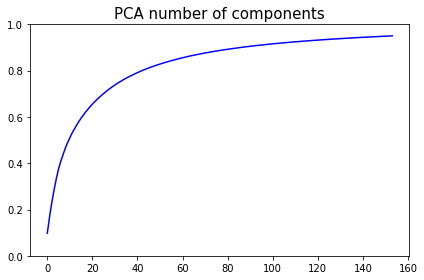

In [23]:
plt.figure(figsize = (6, 4))
plt.plot(list(range(len(pca_model_2.explained_variance_ratio_))),
         np.cumsum(pca_model_2.explained_variance_ratio_),
         'b-')

plt.title('PCA number of components', fontsize = 15)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

이것도 너무 오래 걸려...

In [24]:
# n_estimators_list = list(range(50, 501, 25))

# print(n_estimators_list)

In [25]:
# rf_clf1_cv_accuracy = [cross_val_score(estimator = RandomForestClassifier(n_estimators = number),
#                                             X = X_train_pca_2,
#                                             y = y_train,
#                                             cv = 4,
#                                             scoring = make_scorer(accuracy_score)).mean() for number in n_estimators_list]

In [26]:
# rf_clf2_cv_accuracy = [cross_val_score(estimator = RandomForestClassifier(n_estimators = number),
#                                             X = X_train,
#                                             y = y_train,
#                                             cv = 4,
#                                             scoring = make_scorer(accuracy_score)).mean() for number in n_estimators_list]

In [27]:
# best_n_estimators_1 = n_estimators_list[np.argmax(rf_clf1_cv_accuracy)]

# print("Random Forest with pca max cv accuracy : {:0.2f}%".format(100*np.max(rf_clf1_cv_accuracy)))
# print("CV accuracy가 최대일 때의 n_estimators : {}".format(best_n_estimators_1))

In [28]:
# best_n_estimators_2 = n_estimators_list[np.argmax(rf_clf2_cv_accuracy)]

# print("Random Forest without pca max cv accuracy : {:0.2f}%".format(100*np.max(rf_clf2_cv_accuracy)))
# print("CV accuracy가 최대일 때의 n_estimators : {}".format(best_n_estimators_2))

In [29]:
rf_clf1 = RandomForestClassifier(random_state = 20152410)
rf_clf2 = RandomForestClassifier(random_state = 20152410)

In [30]:
rf_clf1.fit(X_train_pca_2, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20152410,
                       verbose=0, warm_start=False)

In [31]:
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20152410,
                       verbose=0, warm_start=False)

In [32]:
y_test_pred_rf1 = rf_clf1.predict(X_test_pca_2)
y_test_pred_rf2 = rf_clf2.predict(X_test)

In [33]:
print("Random Forest with pca test accuracy : {:0.2f}%".format(100*accuracy_score(y_test, y_test_pred_rf1)))
print("\n")
print(confusion_matrix(y_test, y_test_pred_rf1))
print("\n")
print(classification_report(y_test, y_test_pred_rf1))

Random Forest with pca test accuracy : 94.61%


[[ 958    0    5    4    1    2    8    2    5    1]
 [   0 1104    7    5    2    2    3    0    2    0]
 [   6    0  947    8    4    1    3   11   18    1]
 [   1    1   16  949    0    9    6    5   23   10]
 [   1    1    6    3  934    0    6    2    6   16]
 [   4    0    1   27    9  831   14    2    7    7]
 [   6    1    4    1    3   19  946    0    2    0]
 [   2    3    8    2   12    0    0  991    5   19]
 [   8    6   11   21    4   15    4    3  890   13]
 [   3    3    6   18   26    6    1   16    4  911]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       986
           1       0.99      0.98      0.98      1125
           2       0.94      0.95      0.94       999
           3       0.91      0.93      0.92      1020
           4       0.94      0.96      0.95       975
           5       0.94      0.92      0.93       902
           6       0.95      0.96      0

In [34]:
print("Random Forest without pca test accuracy : {:0.2f}%".format(100*accuracy_score(y_test, y_test_pred_rf2)))
print("\n")
print(confusion_matrix(y_test, y_test_pred_rf2))
print("\n")
print(classification_report(y_test, y_test_pred_rf2))

Random Forest without pca test accuracy : 96.87%


[[ 967    0    1    1    0    2    6    0    8    1]
 [   1 1114    3    5    0    0    1    0    0    1]
 [   5    0  972    4    3    0    3    6    6    0]
 [   0    2   17  969    0   12    2    5    9    4]
 [   3    0    2    0  947    0    3    2    3   15]
 [   2    0    0   12    4  869    5    1    5    4]
 [   4    2    1    0    1    9  963    0    2    0]
 [   1    1    8    0    6    0    0 1010    0   16]
 [   4    5    4    2    2    5    4    1  936   12]
 [   3    2    3   13   12    4    0   11    6  940]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       986
           1       0.99      0.99      0.99      1125
           2       0.96      0.97      0.97       999
           3       0.96      0.95      0.96      1020
           4       0.97      0.97      0.97       975
           5       0.96      0.96      0.96       902
           6       0.98      0.98    